# Blackbody radiation - Lab Notebook

In [1]:
# Requirements
import numpy as np
import matplotlib.pyplot as plt

## Task 1

In [2]:
#Requirements
import math

In [3]:
# Define constants
h = 6.63E-34 # Planck's constant
c = 3E8 # Speed of light (air/vaccum)
k = 1.38E-23 # Boltzman constant
T = 5780 #K 
stefan_boltzman = 5.67E-8

In [4]:
def Bv(wavelength, temperature):
    return (2 * h * c**2)/((wavelength ** 5) * (math.exp((h * c)/(wavelength * k * temperature)) - 1))

In [5]:
def get_theoretical_distrubution(temperature):
    distrubution_values = []
    for i in range(200, 1500, 10):
        wavelength = i * (10**-9) # conversion to metres
        distrubution_values.append((Bv(wavelength = wavelength, temperature = temperature), wavelength))  
    return np.array(distrubution_values)

In [6]:
distrubution_array = get_theoretical_distrubution(temperature = T)

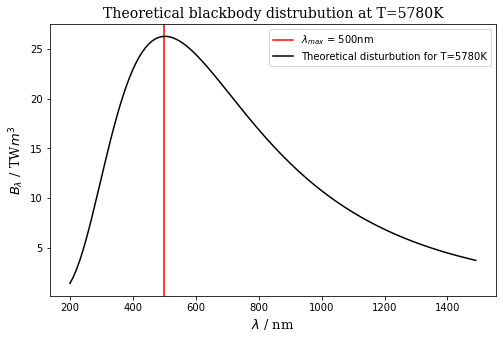

In [38]:
task1_fig_a, ax = plt.subplots()
task1_fig_a.set_figwidth(8)
task1_fig_a.set_figheight(5)
ax.set_xlabel('$\lambda$ / nm', font="serif", size=13)
ax.set_ylabel('$I_{\lambda}$ / TW$m^3$', font="serif", size=13)
ax.set_title('Theoretical blackbody distrubution at T=5780K', font="serif", size="14")
plt.axvline(x=500, color="red", label="$\lambda_{max}$ = 500nm")
plt.plot(list(value[1] * 10**9 for value in distrubution_array), list(value[0]/ 1E12 for value in distrubution_array), color="black", label="Theoretical disturbution for T={}K".format(T))
ax.legend(loc="upper right")
plt.savefig('task1_fig_a.png')

In [8]:
for i in distrubution_array:
    if i[0] == np.amax(distrubution_array):
        print(f"Maximum wavelength from the distrubution gives {round(i[1]*10**9)} nm")

Maximum wavelength from the distrubution gives 500 nm


#### The maximum value from this function corresponds to a wavelength of 500nm. This is inline with expectations other blackbodies given Wien's law: 

$$  \lambda_{max} = \frac{b}{T} $$

In [9]:
max_wavelength = (2.897771955*(10**-3))/T
print(f"Wien's law gives maximum wavelength = {max_wavelength} m or {max_wavelength*10**9}nm")

Wien's law gives maximum wavelength = 5.013446288927335e-07 m or 501.3446288927335nm


## Task 2

#### a) Source, voltmeter, ammeter, halogen bulb, optical cable, spectrograph connected to computer. 

#### b) By increasing the voltage and current, the spectrograph changes by increasing it's peak value and becomes narrower.

## Task 3

In [10]:
import pandas as pd
import os

In [11]:
measured_distrubution=pd.read_excel(open(r'{}\12V_relative_intensity_wavelength.xlsx'.format(os.getcwd()),'rb'))
theoretical_distrubution = pd.DataFrame(get_theoretical_distrubution(temperature = 3000), columns=['intensity', 'wavelength'])

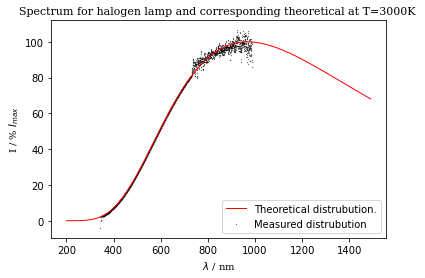

In [43]:
task3_fig_a, ax = plt.subplots()

ax.set_title('Spectrum for halogen lamp and corresponding theoretical at T=3000K ', font="serif", size=11)
ax.set_xlabel('$\lambda$ / nm ', fontname='serif')
ax.set_ylabel('I / % $I_{max}$', fontname='serif')
plt.scatter(measured_distrubution['wavelength'], measured_distrubution['relative_intensity'], label='Measured distrubution', s=0.05, color="black")

max_intensity = np.amax(theoretical_distrubution['intensity'])

plt.plot(theoretical_distrubution['wavelength'] * 10**9 , 100 * theoretical_distrubution['intensity'] / max_intensity, label="Theoretical distrubution.", color="red", lw=1.0)
plt.legend(loc="lower right")
plt.savefig('task3_fig_a.png')

## Task 4

$$ P = \sigma T^{x} $$

Therefore, 

$$ \ln{P} = \ln{\sigma} + x\ln{T} $$

In [13]:
task4_xlsx=pd.read_excel(open(r'{}\power_temperature_variation.xlsx'.format(os.getcwd()),'rb'))

In [14]:
task4_xlsx['average_temperature'] = round((task4_xlsx['temperature_1'] + task4_xlsx['temperature_2'])/2, 1)

In [15]:
task4_xlsx['power'] = task4_xlsx['current'] * task4_xlsx['voltage']

In [16]:
def chi(observed, expected, sigma):
    return ((observed - expected)**2)/(sigma**2)

In [17]:
V_uncertainty = 0.1
I_uncertainty = 0.01
def power_uncertainty(V, I):
    return math.sqrt((V**2 * I_uncertainty**2) + (I**2 * V_uncertainty))
def log_power_uncertainty(V, I):
    return power_uncertainty(V, I)/(V*I)

The corresponding value chisquare minimum value for x = 4.02


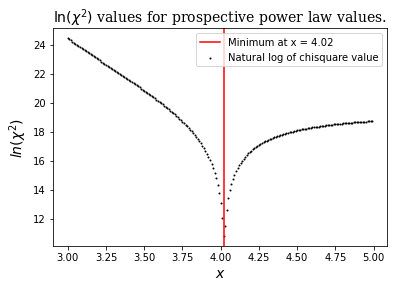

In [42]:
### chisqaure fit for task4 - gradient = x.

bb_area = 2048 * (2E-9) # area of dectector
chisquare_series = []
for i in range(300, 500, 1):
    chisquare_sum = 0
    for j in range(len(task4_xlsx['power'])):
        expected_temperature = (task4_xlsx['power'][j] / (stefan_boltzman * bb_area))**(100/i)
        
        sigma = power_uncertainty(task4_xlsx['voltage'][j], task4_xlsx['current'][j])
        
        chisquare_sum += chi(task4_xlsx['average_temperature'][j], expected_temperature, sigma)
    
    chisquare_series.append([chisquare_sum, i])

for i in chisquare_series:
    if i[0] == np.min(list(value[0] for value in chisquare_series)):
        min_value = i[1]/100
        print(f'The corresponding value chisquare minimum value for x = {min_value}')

task4_fig_a, ax = plt.subplots()

ax.set_title('$ \ln(\chi^{2})$ values for prospective power law values.', font="serif", size="14")
ax.set_xlabel('$x$', font="serif", size="14")
ax.set_ylabel('$ln(\chi^{2})$', font="serif", size="14")
plt.axvline(x=4.02, color="red", label="Minimum at x = 4.02")
plt.scatter(list(float(value[1]/100) for value in chisquare_series),np.log(list(value[0] for value in chisquare_series)), s=1, color="black", label="Natural log of chisquare value")
plt.legend(loc='upper right')
plt.savefig('task4_fig_a.png')

#### Corresponding $ \chi^{2}_{min} $ gives x = 4.02

In [19]:
x = 4.02

In [20]:
log_p_uncertainties = []
for i in range(len(task4_xlsx['voltage'])):
    log_p_uncertainties.append(log_power_uncertainty(task4_xlsx['voltage'][i], task4_xlsx['current'][i]))
print(f'The uncertainty in the x value is {np.mean(log_p_uncertainties)}')

The uncertainty in the x value is 0.03770863963132147


X = 4.02 $\pm$ 0.04

In [21]:
task4_xlsx['log_temperature'] = np.log(task4_xlsx['average_temperature'])
task4_xlsx['log_power'] = np.log(task4_xlsx['power'])

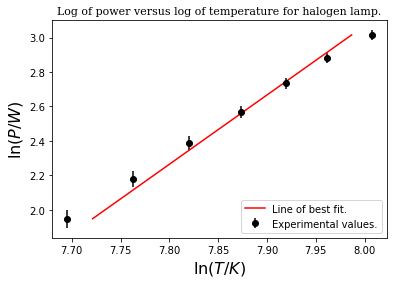

In [22]:
task4_fig_b, ax = plt.subplots()


ax.set_title('Log of power versus log of temperature for halogen lamp.', font="serif", size=11)
ax.set_xlabel('$\ln(T/K )$', font="serif", size=16)
ax.set_ylabel('$\ln(P/W)$', font="serif", size=16)

plt.errorbar(task4_xlsx['log_temperature'], task4_xlsx['log_power'], yerr=list(log_power_uncertainty(task4_xlsx['voltage'][i], task4_xlsx['current'][i]) for i in range(len(task4_xlsx['power']))), color="black",fmt="o", label="Experimental values.")

plt.plot(np.log((task4_xlsx['power'] / (stefan_boltzman * bb_area))**(1/x)), task4_xlsx['log_power'], color='red', label="Line of best fit.")
ax.legend(loc="lower right")
#plt.savefig('task4_fig_b.png')

$$ \ln(P) = x \ln(T) + \ln(\sigma)$$
$$ \ln(\sigma) = \ln(P) - x\ln(T) $$
$$ \sigma = e^{\ln(P) - x\ln(T)}$$

In [23]:
#print(np.log((task4_xlsx['power'] / (stefan_boltzman * bb_area))**(1/x)))
print('Average value for Stefan-Boltzam across data for x = 4.02, sigma = {}'.format(np.mean(np.exp(np.log(task4_xlsx['power']/bb_area) - (x * np.log(task4_xlsx['average_temperature']))))))

Average value for Stefan-Boltzam across data for x = 4.02, sigma = 5.751270478995251e-08


Accepted value : $\sigma =$ 5.670374419...×10−8 $W⋅m^{−2}⋅K^{−4}$

In [24]:
k_uncertainties = []
def k_uncertainty(p, t, x):
    p_component = ((1/t**x)**2) * (0.04)**2
    x_component = (((1/x**2) * math.exp(math.log(p)/math.log(T)))**2) * (0.04)**2
    return math.sqrt(p_component + x_component)
for i in range(len(task4_xlsx['average_temperature'])):
    k_uncertainties.append(k_uncertainty(task4_xlsx['power'][i], task4_xlsx['average_temperature'][i], 4.02))
print(np.mean(k_uncertainties))

0.003317655012479503


## Task 5

In [25]:
with open(r'{}\cobe_spectrum.txt'.format(os.getcwd()), 'r') as f:
    cobe_data = []
    for line in f:
        entry = line.lstrip().rstrip().split('   ')
        cobe_data.append([float(entry[0]), float(entry[1]), int(entry[2])])

In [26]:
cobe_df = pd.DataFrame(cobe_data, columns=['wavenumber', 'flux', 'flux_uncertainty'])

In [27]:
max_flux = np.amax(cobe_df['flux'])
cobe_df['relative_intensity'] = cobe_df['flux'] / max_flux

In [28]:
cobe_df['wavelength'] = 1/(cobe_df['wavenumber'] * 10**2)
cobe_df['frequency'] = c / cobe_df['wavelength']

In [29]:
def b_f(frequency, temperature): # this is the radiance as a function of frequency and temperature
    frac_1 =  (2 * h * (frequency**3)) / (c**2)
    frac_2 = 1/(math.exp((h * frequency)/(k * temperature)) - 1)
    return frac_1 * frac_2

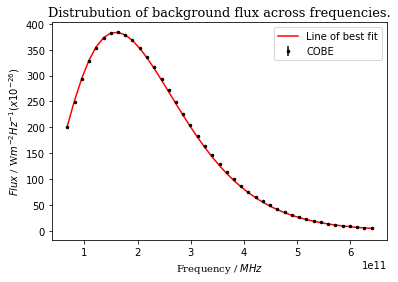

In [30]:
distrubution_values = []
temperature = 2.71

for frequency in cobe_df['frequency']:
    distrubution_values.append(b_f(frequency=frequency , temperature=temperature))

max_theoretical_value = np.amax(distrubution_values)
normalized_distrubution_values = list(map(lambda value: (max_flux * value/max_theoretical_value), distrubution_values))

task5_fig_a, ax = plt.subplots()

ax.set_title('Distrubution of background flux across frequencies.', font="serif", size=13)
ax.set_xlabel('Frequency / $MHz$', font="serif")
ax.set_ylabel('$ Flux$ / W$m^{-2} Hz^{-1} (x10^{-26})$', font="serif")

plt.errorbar(cobe_df['frequency'], cobe_df['flux'] , yerr=list((cobe_df['flux_uncertainty'] * 10E-3)), fmt="o", color="black", ms=2.5, label="COBE")
plt.plot(cobe_df['frequency'], normalized_distrubution_values, color="red", label="Line of best fit")

ax.legend(loc="upper right")
plt.savefig('task5_fig_a.png')

Chi square minimum value yields T = 2.73K


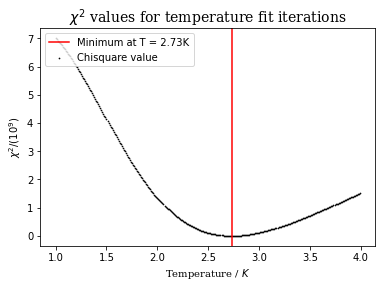

In [32]:
chisquare_series = []
for t in range(100, 400, 1):
    distrubution_values = []
    chisquare_sum = 0
            
    for frequency in cobe_df['frequency']:
        distrubution_values.append(b_f(frequency=frequency , temperature=t/100))
        #print(distrubution_values)
    
    max_theoretical_value = np.amax(distrubution_values)

    normalized_distrubution_values = list(map(lambda value: (max_flux * value/max_theoretical_value), distrubution_values))
    for i in range(len(cobe_df['flux'])): 
        chisquare_sum += chi(cobe_df['flux'][i], normalized_distrubution_values[i], cobe_df['flux_uncertainty'][i] * 10**-3) # Used 1.8E8 as well but 1.9E8 seems to give one minimum at 2.70K

    chisquare_series.append([chisquare_sum, t])

for i in chisquare_series:
    if i[0] == np.min(chisquare_series):
        min_value = i[1]/100
        print(f'Chi square minimum value yields T = {min_value}K')
    else:
        pass

task5_fig_b, ax = plt.subplots()

#ax.yaxis.set_major_formatter(y_formatter)
ax.set_title('$\chi^{2}$ values for temperature fit iterations', font="serif", size=14)
ax.set_xlabel('Temperature / $K$', font="serif")
ax.set_ylabel('$\chi^{2}/ (10^{9})$', font="serif")
x = plt.scatter(list(value[1]/100 for value in chisquare_series), (list(value[0]/1E9 for value in chisquare_series)), s=0.5, color="black", label="Chisquare value")
plt.axvline(x=min_value, color="red", label=f"Minimum at T = {min_value}K")
#chisqaure_series = np.array(chisquare_series)
plt.legend(loc="upper left")
plt.savefig('task5_fig_b.png')

In [36]:
print('Percentage error in Stefan-Boltzman constant: {}%'.format((np.mean(cobe_df['flux_uncertainty'])*10E-3) / (np.mean(cobe_df['flux'])) * 100))

Percentage error in Stefan-Boltzman constant: 0.19883908893046048%


## Report generator

### Scripts to generate latex template

In [34]:
from pylatex import Document, NewPage, \
    Section, Subsection, Math, PageStyle, \
    LargeText, MediumText, LineBreak, Command, Foot, Head, Hyperref, Package, Figure

from pylatex.utils import bold, NoEscape, escape_latex

In [35]:
doc = Document( geometry_options = {"tmargin": "2cm", "lmargin": "3cm", "rmargin":"3cm"})

doc.preamble.append(Command("title", "On blackbody radiation."))
doc.preamble.append(Command("author", "Brian Rogers"))
doc.append(NoEscape(r'\maketitle'))

### Abstract

In [34]:
with doc.create(Section('Abstract')):
    doc.append("This report aims to address two main objectives. Firstly, to verify the Stefan-Boltzman law, an underpinnnig equation in blackbody radiation theory. Secondly, to measure the temperature of the cosmic background radiation, the photons that permeate the universe. These photons provide key evidence in the 'big bang' theory. A measurement will be reached by analysis on data collected during the COBE experiment, using theory developed from radiation of a blackbody.")

### Introduction

In [547]:
with doc.create(Section('Introduction')):
    doc.append('')
    #doc.append(task1_fig_a)
    with doc.create(Figure(position='htp')) as plot:
        plot.add_image('task1_fig_a.png',  width='300px')
        plot.add_caption('Example theoretical plot of a blackbody emission distrubution for T=5780K')

### Methodology, Results and Analysis

In [548]:
with doc.create(Section('Verification of the Stefan-Boltzman law')):
    doc.append('')
    with doc.create(Subsection('Methodology')):
        doc.append('')
    with doc.create(Subsection('Results')):
        doc.append('')
    with doc.create(Subsection('Analysis')):
        with doc.create(Figure(position='htbp')) as plot:
            #plot.append(Plot(name='model', func='-x^5 - 242'))
            plot.add_image('task4_fig_a.png', width='300px')
            plot.add_caption(' yields x = 4.02')
        doc.append('Created using matplotlib.')

        with doc.create(Figure(position='htp')) as plot:
            #plot.append(Plot(name='model', func='-x^5 - 242'))
            plot.add_image('task4_fig_b.png',  width='300px')
            plot.add_caption('Experimental plot with Stefan-Boltzman theoretical curve')
        doc.append('Created using matplotlib.')

with doc.create(Section('Measurement of the temperature of the cosmic background radiation')):
    doc.append('')
    with doc.create(Subsection('Methodology')):
        doc.append('')
    with doc.create(Subsection('Results')):
        doc.append('')
    with doc.create(Subsection('Analysis')):
        with doc.create(Figure(position='htbp')) as plot:
            #plot.append(Plot(name='model', func='-x^5 - 242'))
            plot.add_image('task5_fig_a.png', width='300px')
            plot.add_caption('$\chi^2_{min}$ yields T = 2.71K ')
        doc.append('Created using matplotlib.')

        with doc.create(Figure(position='htp')) as plot:
            #plot.append(Plot(name='model', func='-x^5 - 242'))
            plot.add_image('task5_fig_b.png',  width='300px')
            plot.add_caption('COBE experimental data')
        doc.append('Created using matplotlib.')


### Discussion

In [549]:
with doc.create(Section('Discussion')):
    doc.append('')

### Conclusion

In [550]:
with doc.create(Section('Conclusion')):
    doc.append('')

### References

In [551]:
with doc.create(Section('References')):
    doc.append('')

In [552]:
#doc.generate_pdf('blackbody_report', clean_tex=False)